<a href="https://colab.research.google.com/github/liezliez/GaitAngle-using-SensorFusion-IMU/blob/main/GaitAngle_using_sensorfusionIMU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Header

In [ ]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 
import pandas as pd
import io
import numpy as np
from sympy import *
import math

pi = 3.14159265359

#Read xls File

In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_excel(uploaded['Sudut_Gait_2021-04-10_13-02-28.xls'])
xls = pd.ExcelFile(uploaded['Sudut_Gait_2021-04-10_13-02-28.xls'])

Saving Sudut_Gait_2021-04-10_13-02-28.xls to Sudut_Gait_2021-04-10_13-02-28.xls


#Dataframe per-Sheet

In [ ]:
dfGyro = pd.read_excel(xls, 'Gyroscope')
dfAccel = pd.read_excel(xls, 'Linear Acceleration')
dfMetaDevice = pd.read_excel(xls, 'Metadata Time')
dfMetaTime = pd.read_excel(xls, 'Metadata Device')


In [ ]:
print("Data Gyroscope \n",dfGyro)
print("\n")
print("Data Linear Acceleration \n",dfAccel)

Data Gyroscope 
        Time (s)  Gyroscope x (rad/s)  Gyroscope y (rad/s)  Gyroscope z (rad/s)
0      0.160344             0.023743             0.155610            -0.004140
1      0.172610             0.021613             0.140700            -0.003075
2      0.182645             0.025873             0.134310            -0.006270
3      0.195150             0.030133             0.114075            -0.002010
4      0.205186             0.035458             0.095970            -0.003075
...         ...                  ...                  ...                  ...
4380  45.647098             0.185623            -0.095730             0.076800
4381  45.657104             0.236743            -0.230985             0.106620
4382  45.667110             0.214378            -0.232050            -0.010530
4383  45.679555             0.073798            -0.003075            -0.166020
4384  45.689561             0.063148             0.000120            -0.156435

[4385 rows x 4 columns]


Data Lin

#Data Plot

In [ ]:
#masih dalam satuan rad/s
gtime = dfGyro['Time (s)']
gx = dfGyro['Gyroscope x (rad/s)']
gy = dfGyro['Gyroscope y (rad/s)']
gz = dfGyro['Gyroscope z (rad/s)']

#Jika diminta degree/s
gdx = dfGyro['Gyroscope x (rad/s)']*180/pi
gdy = dfGyro['Gyroscope y (rad/s)']*180/pi
gdz = dfGyro['Gyroscope z (rad/s)']*180/pi

atime = dfAccel['Time (s)']
ax = dfAccel['Linear Acceleration x (m/s^2)']
ay = dfAccel['Linear Acceleration y (m/s^2)']
az = dfAccel['Linear Acceleration z (m/s^2)']

#Gyroscope

Sumbu X

<function matplotlib.pyplot.show>

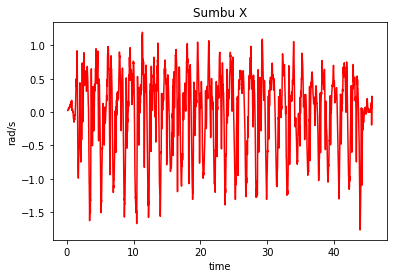

In [ ]:
plt.title('Sumbu X')
plt.xlabel('time')
plt.ylabel('rad/s')
plt.plot(gtime,gx, color = 'red')
plt.show

Sumbu Y

<function matplotlib.pyplot.show>

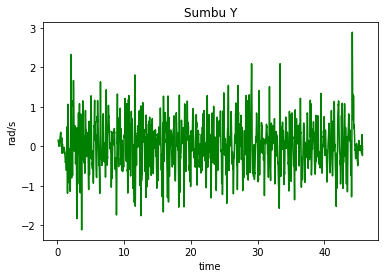

In [ ]:
plt.title('Sumbu Y')
plt.xlabel('time')
plt.ylabel('rad/s')
plt.plot(gtime,gy, color = 'green')
plt.show

Sumbu Z

<function matplotlib.pyplot.show>

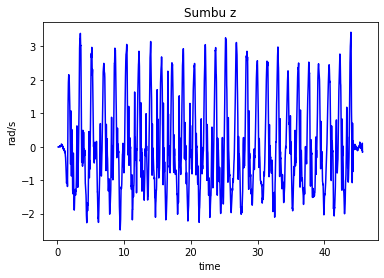

In [ ]:
plt.title('Sumbu z')
plt.xlabel('time')
plt.ylabel('rad/s')
plt.plot(gtime,gz, color = 'blue')
plt.show

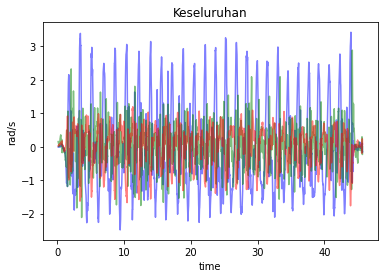

In [ ]:
plt.title('Keseluruhan')
plt.plot(gtime,gz, color = 'blue', alpha = 0.5)
plt.plot(gtime,gy, color = 'green', alpha = 0.5)
plt.plot(gtime,gx, color = 'red', alpha = 0.5)
plt.xlabel('time')
plt.ylabel('rad/s')
plt.show()

#Linear Accelerometer

Sumbu X 

<function matplotlib.pyplot.show>

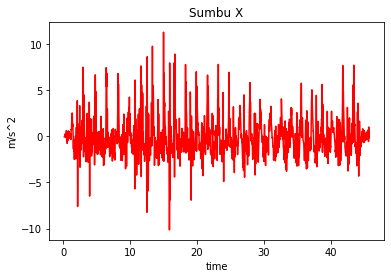

In [ ]:
plt.title('Sumbu X')
plt.xlabel('time')
plt.ylabel('m/s^2')
plt.plot(atime,ax, color = 'red')
plt.show

Sumbu Y

<function matplotlib.pyplot.show>

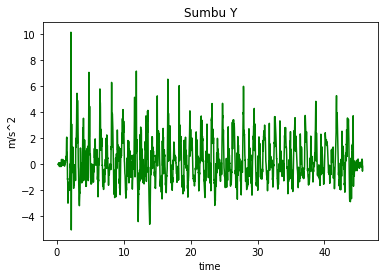

In [ ]:
plt.title('Sumbu Y')
plt.xlabel('time')
plt.ylabel('m/s^2')
plt.plot(atime,ay, color = 'green')
plt.show

Sumbu Z

<function matplotlib.pyplot.show>

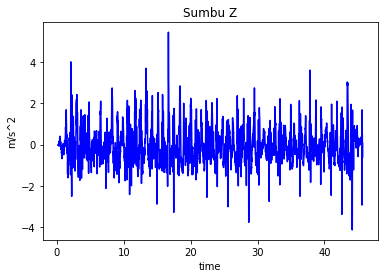

In [ ]:
plt.title('Sumbu Z')
plt.xlabel('time')
plt.ylabel('m/s^2')
plt.plot(atime,az, color = 'blue')
plt.show

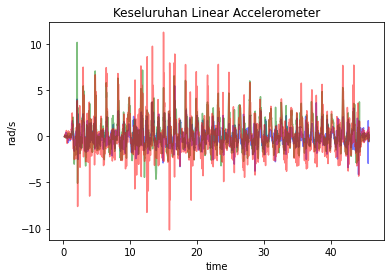

In [ ]:
plt.title('Keseluruhan Linear Accelerometer')
plt.plot(atime,az, color = 'blue', alpha = 0.5)
plt.plot(atime,ay, color = 'green', alpha = 0.5)
plt.plot(atime,ax, color = 'red', alpha = 0.5)
plt.xlabel('time')
plt.ylabel('rad/s')
plt.show()

#Mencari Sudut Accelerometer

In [ ]:
def sudutAccel (x,y,z):
  isian = z/math.sqrt((y*y)+(x*x))
  sudut = math.atan(isian)
  return sudut

dataSudutAccel= {"Sudut Accelerometer": []}  
df = pd.DataFrame(dataSudutAccel)


lengtha = len(ax)
i = 0
for i in range (lengtha):
  values = 180/pi*sudutAccel(ax[i],ay[i],az[i])/2
  df.loc[i] = [values]

dataSudutAccel = df
print("Sudut Max, Sudut Min :")
print(dataSudutAccel.max())
print(dataSudutAccel.min())
print(dataSudutAccel)

Sudut Max, Sudut Min :
Sudut Accelerometer    44.42737
dtype: float64
Sudut Accelerometer   -43.510957
dtype: float64
      Sudut Accelerometer
0               -4.279864
1               -2.246383
2              -25.678440
3               -9.586961
4              -22.148751
...                   ...
4215             1.232442
4216            19.960313
4217            12.164710
4218           -14.604859
4219             7.120614

[4220 rows x 1 columns]


<function matplotlib.pyplot.show>

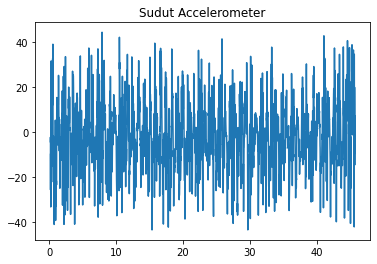

In [ ]:
plt.title('Sudut Accelerometer')
plt.plot(atime, dataSudutAccel)
plt.show

#Mencari sudut Gyroscope (GyroAngle)

In [ ]:
def gyroAngle(gdz,gtime,gtimePrevious):
  kenaikanWaktu = gtime - gtimePrevious
  kenaikanSudut = gdz * kenaikanWaktu
  gyroAngle = (gdz + kenaikanSudut)/2
  return gyroAngle
  

dataSudutGyro = {"Sudut Gyro": []}  
df = pd.DataFrame(dataSudutGyro)

lengthg = len(gdz)
i = 0
for i in range (lengthg):
  if (i > 0):
    values = 180/pi*(gyroAngle(gy[i],gtime[i],gtime[i-1]))/2
    df.loc[i] = [values]
  else:
    df.loc[i] = gy[i]


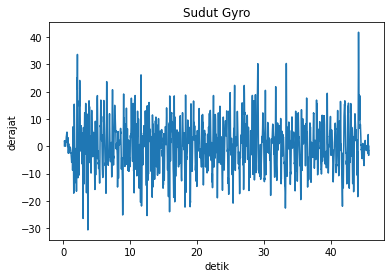

In [ ]:
dataSudutGyro = df
plt.title('Sudut Gyro')
plt.xlabel('detik')
plt.ylabel('derajat')
plt.plot(gtime,dataSudutGyro)
plt.show()

#Complementary Filter

In [ ]:
def complemenFilter(prevSudut ,dataSudutGyro,dataSudutAccel):
  sudut = 0.98*(dataSudutGyro) + 0.02*(dataSudutAccel)/2
  return sudut

In [ ]:
dataSudutCF = {"Sudut CF": []}  
df = pd.DataFrame(dataSudutCF)
#Jumlah Sampel Accelerometer dan Gyrometer saya ternyata berbeda sehingga saya pakai 4220 data saja
panjangSampel = 4220


prevSudut = 0
for i in range (panjangSampel):
  values = complemenFilter(prevSudut, dataSudutGyro['Sudut Gyro'][i], dataSudutAccel['Sudut Accelerometer'][i])
  df.loc[i] = [values]
  prevSudut = values

dataSudutCF = df

Plotting Complementary Filter

Sudut CF    33.176101
dtype: float64
Sudut CF   -30.054325
dtype: float64


<function matplotlib.pyplot.show>

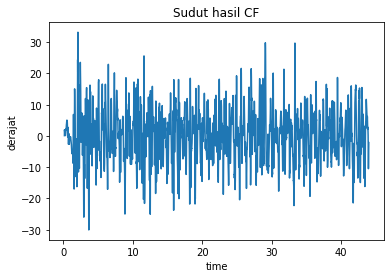

In [ ]:
timeCF = {"time CF": []}  
df = pd.DataFrame(timeCF)
for i in range (4220):
  df.loc[i] = gtime[i]
timeCF = df

plt.title('Sudut hasil CF')
plt.ylabel('derajat')
plt.xlabel('time')
plt.plot(timeCF,dataSudutCF)
print(dataSudutCF.max())
print(dataSudutCF.min())
plt.show

#Sudut Gait Angle

In [ ]:
dataSudutGait = {"Sudut Gait": []}  
df = pd.DataFrame(dataSudutGait)

def gaitAngle(dataSudutCF):
  if (dataSudutCF < 0 ):
    return 0
  else:
    return dataSudutCF
  

In [ ]:
for i in range (panjangSampel):
  values = gaitAngle(dataSudutCF['Sudut CF'][i])
  df.loc[i] = [values]

dataSudutGait = df

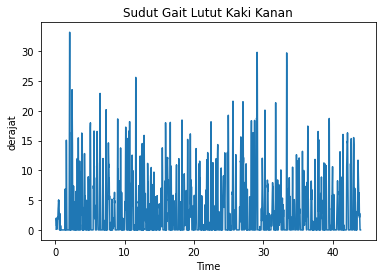

In [ ]:
plt.title('Sudut Gait Lutut Kaki Kanan')
plt.xlabel('Time')
plt.ylabel('derajat')
plt.plot(timeCF,dataSudutGait)
plt.show()